<a href="https://colab.research.google.com/github/turnontheAC/SQC/blob/sqc/chapter_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import math
import random
import scipy
import statistics
import numpy as np
import scipy.stats
from scipy import stats
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import plotly.graph_objects as go
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.stats.multicomp as mc
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

13.19.A nickel–titanium alloy is used to make componentsfor  jet  turbine  aircraft  engines.  Cracking  is  a  poten-tially serious problem in the final part because it canlead to nonrecoverable failure. A test is run at the partsproducer  to  determine  the  effect  of  four  factors  oncracks. The four factors are pouring temperature (A),titanium content (B), heat treatment method (C), andamount of grain refiner used (D). Two replicates ofa 24design are run, and the length of crack (in mm×10−2) induced in a sample coupon subjected to astandard  test  is  measured.  The  data  are  shown  inTable 13E.6.(a)  Estimate  the  factor  effects.  Which  factor  effectsappear to be large?(b)  Conduct  an  analysis  of  variance.  Do  any  of  thefactors affect cracking? Use a=0.05.(c)  Write down a regression model that can be usedto predict crack length as a function of the signif-icant  main  effects  and  interactions  you  haveidentified in part (b).(d)  Analyze the residuals from this experiment.(e)  Is there an indication that any of the factors affectthe variability in cracking?(f )  What recommendations would you make regard-ing  process  operations?  Use  interaction  and/ormain effect plots to assist in drawing conclusions.

In [25]:
df = pd.read_csv('/content/lab6 - Sheet1.csv') 
df

,A,B,C,D,combo,results
0,-1,-1,-1,-1,one,7.037
1,1,-1,-1,-1,a,14.707
2,-1,1,-1,-1,b,11.635
3,1,1,-1,-1,ab,17.273
4,-1,-1,1,-1,c,10.403
5,1,-1,1,-1,ac,4.368
6,-1,1,1,-1,bc,9.360
7,1,1,1,-1,abc,13.440
8,-1,-1,-1,1,d,8.561
9,1,-1,-1,1,ad,16.867


In [26]:
df2=df
x1x2x3x4=df['A'] * df['B'] *df['C'] * df['D']
df2['ABCD']=x1x2x3x4
df2

,A,B,C,D,combo,results,ABCD
0,-1,-1,-1,-1,one,7.037,1
1,1,-1,-1,-1,a,14.707,-1
2,-1,1,-1,-1,b,11.635,-1
3,1,1,-1,-1,ab,17.273,1
4,-1,-1,1,-1,c,10.403,-1
5,1,-1,1,-1,ac,4.368,1
6,-1,1,1,-1,bc,9.360,1
7,1,1,1,-1,abc,13.440,-1
8,-1,-1,-1,1,d,8.561,-1
9,1,-1,-1,1,ad,16.867,1


In [27]:

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   A        32 non-null     int64  
 1   B        32 non-null     int64  
 2   C        32 non-null     int64  
 3   D        32 non-null     int64  
 4   combo    32 non-null     object 
 5   results  32 non-null     float64
 6   ABCD     32 non-null     int64  
dtypes: float64(1), int64(5), object(1)
memory usage: 1.9+ KB


In [28]:
Xmain=df[['A', 'B', 'C', 'D']]
Xmain

,A,B,C,D
0,-1,-1,-1,-1
1,1,-1,-1,-1
2,-1,1,-1,-1
3,1,1,-1,-1
4,-1,-1,1,-1
5,1,-1,1,-1
6,-1,1,1,-1
7,1,1,1,-1
8,-1,-1,-1,1
9,1,-1,-1,1


In [29]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4', 'x1x3x4','x2x3x4'])
xxpd

,I,x1,x2,x3,x4,x1x2,x1x3,x1x4,x2x3,x2x4,x3x4,x1x2x3,x1x2x4,x1x3x4,x2x3x4
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [30]:
X=xxpd[['x1','x2','x3','x4', 'x1x4']]
Y=df[['results']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)
df2['residual1']=eij

[[-2.3124375]
 [ 2.4151875]
 [-1.6890625]
 [ 1.0065625]
 [ 4.6510625]
 [-4.3263125]
 [-0.3665625]
 [ 0.7710625]
 [-2.6696875]
 [ 2.5434375]
 [-1.3293125]
 [ 1.5258125]
 [ 4.2128125]
 [-4.6010625]
 [-0.4178125]
 [ 0.9323125]
 [-2.9734375]
 [ 2.9271875]
 [-1.2350625]
 [ 1.5485625]
 [ 4.3990625]
 [-4.5963125]
 [-0.4735625]
 [ 0.2540625]
 [-2.2796875]
 [ 2.7284375]
 [-1.5473125]
 [ 1.3408125]
 [ 4.7038125]
 [-4.8220625]
 [-0.6728125]
 [ 0.3523125]]


In [31]:
X=xxpd[['I','x1','x2','x3','x4','x1x4']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     7.265
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           0.000225
Time:                        03:29:36   Log-Likelihood:                -77.555
No. Observations:                  32   AIC:                             167.1
Df Residuals:                      26   BIC:                             175.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9874      0.536     22.382      0.0

In [62]:
res.resid

0    -2.312438
1     2.415187
2    -1.689063
3     1.006563
4     4.651062
5    -4.326313
6    -0.366563
7     0.771062
8    -2.669688
9     2.543437
10   -1.329312
11    1.525813
12    4.212812
13   -4.601063
14   -0.417813
15    0.932312
16   -2.973438
17    2.927187
18   -1.235062
19    1.548563
20    4.399062
21   -4.596313
22   -0.473563
23    0.254062
24   -2.279688
25    2.728437
26   -1.547312
27    1.340812
28    4.703812
29   -4.822063
30   -0.672812
31    0.352312
dtype: float64

In [64]:
X=xxpd[['x1','x4','x1x4']]
Y=df2[['results']]
Y=Y.to_numpy()
regr2=LinearRegression()
regr2.fit(X,Y)
Yhat2=regr2.predict(X)
X2=xxpd[['I','x1','x4','x1x4']]
model2 = sm.OLS(Y, X2)
res2=model2.fit()
print(res2.summary())
Yhat2=regr2.predict(X)
eij2=Y-Yhat2
print(eij2)
data2['residual2']=eij2

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.093
Method:                 Least Squares   F-statistic:                     2.062
Date:                Fri, 14 Oct 2022   Prob (F-statistic):              0.128
Time:                        04:06:45   Log-Likelihood:                -88.350
No. Observations:                  32   AIC:                             184.7
Df Residuals:                      28   BIC:                             190.6
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9874      0.723     16.576      0.0

In [63]:
res.resid

0    -2.312438
1     2.415187
2    -1.689063
3     1.006563
4     4.651062
5    -4.326313
6    -0.366563
7     0.771062
8    -2.669688
9     2.543437
10   -1.329312
11    1.525813
12    4.212812
13   -4.601063
14   -0.417813
15    0.932312
16   -2.973438
17    2.927187
18   -1.235062
19    1.548563
20    4.399062
21   -4.596313
22   -0.473563
23    0.254062
24   -2.279688
25    2.728437
26   -1.547312
27    1.340812
28    4.703812
29   -4.822063
30   -0.672812
31    0.352312
dtype: float64

In [45]:
beta=regr.coef_
betas=beta.flatten()
print('reduce model 1 betas,', betas)

beta2=regr2.coef_
betas2=beta2.flatten()
print('reduce model 2 betas,', betas2)


reduce model 1 betas, [ 1.5088125  1.9873125 -1.79875    0.97825    0.037625 ]
reduce model 2 betas, [1.5088125 0.97825   0.037625 ]


In [47]:
Y=df2[['results']].to_numpy()
YF=Y 
SST = sum(Y**2) - (sum(Y))**2/len(YF)


SSR=sum(betas**2) * len(Y) 
DFm= 4
DF2w=1
DFR = DFm + DF2w 
print("SS Model (reduce model 1)", SSR, "DF=", int(DFR))
SSe=SST-SSR
DFe = len(Y)-1 - DFR
print("SS Residual",SSe, "DF=", int(DFe))

print("SS Total", SST, "DF=", len(Y)-1)

SS Model (reduce model 1) 333.43412474999997 DF= 5
SS Residual [238.66575712] DF= 26
SS Total [572.09988187] DF= 31


In [48]:
Y=df2[['results']].to_numpy()
YF=Y 
SSA= (betas[0]**2) * len(YF)
SSD= (betas[1]**2) * len(YF)
SSAD= (betas[2]**2) * len(YF)


SSR=SSA+SSD+SSAD
print("SS Model >", SSR, "DF=", 3)
print("   SSA", SSA, "DF=1")
print('   SSD', SSD, "DF=1")
print("   SSAD", SSAD, "DF=1")
SST = sum(Y**2) - (sum(Y))**2/len(Y)

SSe2=SST-SSR
print("SS Residual error",SSe2, "DF=", len(Y)-1-3)
print("SS Total",SST, "DF=", len(Y)-1)

SS Model > 302.76568625000004 DF= 3
   SSA 72.84848512500004 DF=1
   SSD 126.38115112499997 DF=1
   SSAD 103.53605000000006 DF=1
SS Residual error [269.33419562] DF= 28
SS Total [572.09988187] DF= 31


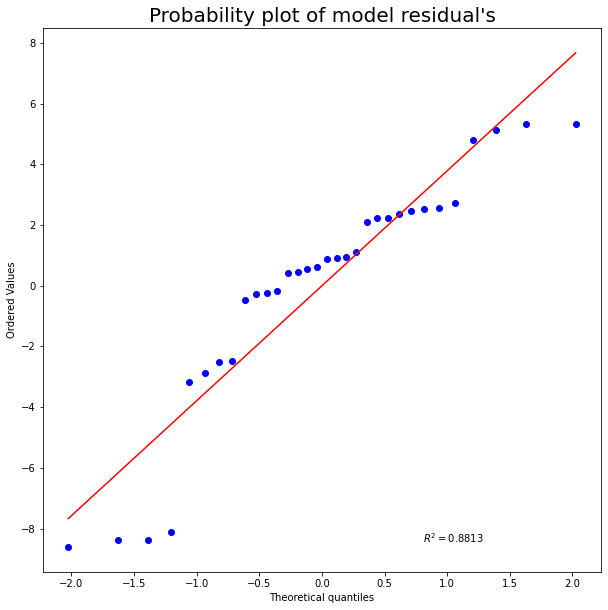

In [49]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res2.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

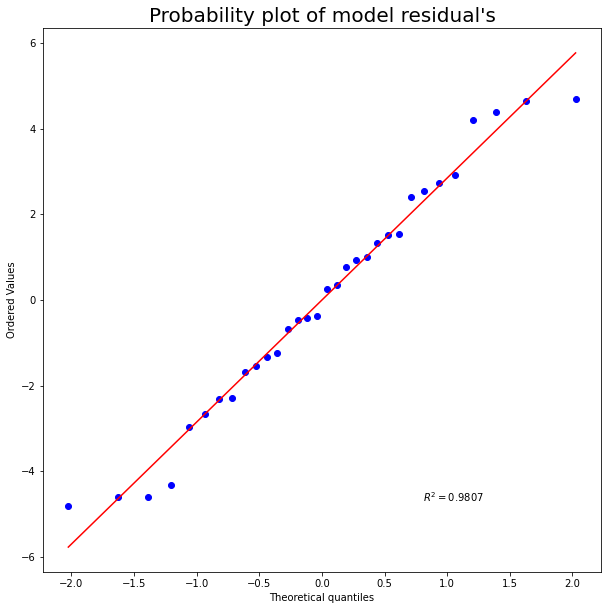

In [33]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

normality_plot, stat = stats.probplot(res.resid, plot= plt, rvalue= True)
ax.set_title("Probability plot of model residual's", fontsize= 20)
ax.set

plt.show()

In [52]:
stats.levene(df2['results'][df['A'] == -1],
             df2['results'][df['A'] == 1])

LeveneResult(statistic=4.655468773948862, pvalue=0.039086757629649624)

In [53]:
stats.levene(df2['results'][df['D'] == -1],
             df2['results'][df['D'] == 1])

LeveneResult(statistic=0.016421828072889316, pvalue=0.8988873070615344)

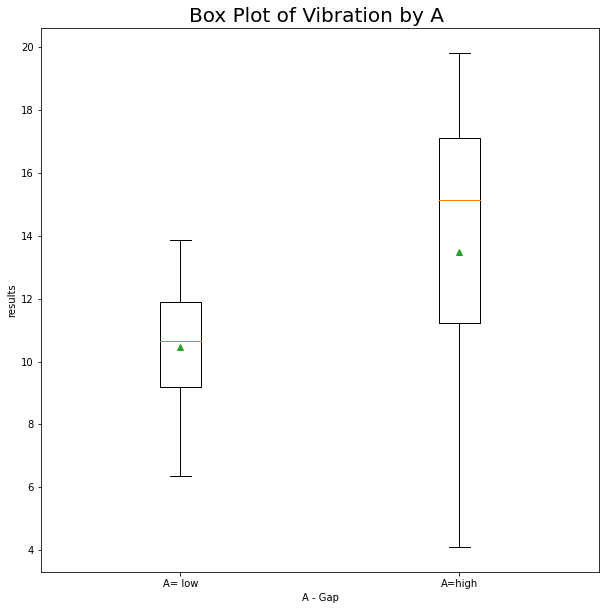

In [55]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by A ", fontsize= 20)
ax.set

boxdata= [df2['results'][df2['A'] == -1],
             df2['results'][df2['A'] == 1]]


ax.boxplot(boxdata,
           labels= ['A= low', 'A=high'],
           showmeans= True)

plt.xlabel("A - Gap")
plt.ylabel("results")

plt.show()

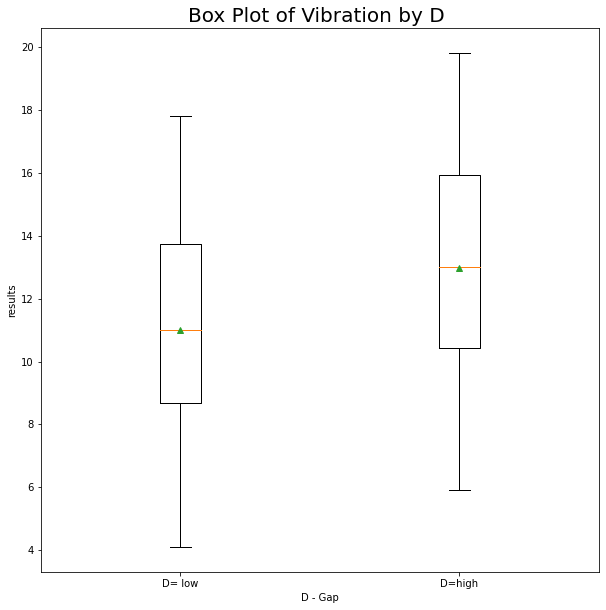

In [56]:
fig = plt.figure(figsize= (10, 10))
ax = fig.add_subplot(111)

ax.set_title("Box Plot of Vibration by D ", fontsize= 20)
ax.set

boxdata= [df2['results'][df2['D'] == -1],
             df2['results'][df2['D'] == 1]]


ax.boxplot(boxdata,
           labels= ['D= low', 'D=high'],
           showmeans= True)

plt.xlabel("D - Gap")
plt.ylabel("results")

plt.show()

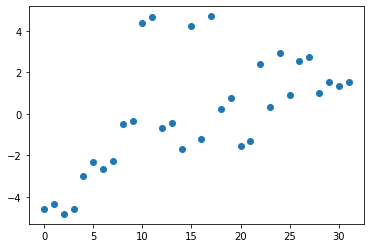

In [60]:
eij=res2.resid
N=len(eij)

x = [i for i in range(N)]
df3=df2.sort_values(['results'], ascending=1)
y = df3['residual1']

plt.scatter(x, y)

13.20

In [74]:
Cplus = pd.read_csv('/content/lab6 - Sheet1 (1).csv') 
Cplus

,A,B,C,D,combo,results
0,-1,-1,1,-1,one,7.037
1,1,-1,1,-1,a,14.707
2,-1,1,1,-1,b,11.635
3,1,1,1,-1,ab,17.273
4,-1,-1,1,-1,c,10.403
5,1,-1,1,-1,ac,4.368
6,-1,1,1,-1,bc,9.360
7,1,1,1,-1,abc,13.440
8,-1,-1,1,1,d,8.561
9,1,-1,1,1,ad,16.867


In [75]:
Cminus = pd.read_csv('/content/lab6 - Sheet1 (2).csv') 
Cminus

,A,B,C,D,combo,results
0,-1,-1,-1,-1,one,7.037
1,1,-1,-1,-1,a,14.707
2,-1,1,-1,-1,b,11.635
3,1,1,-1,-1,ab,17.273
4,-1,-1,-1,-1,c,10.403
5,1,-1,-1,-1,ac,4.368
6,-1,1,-1,-1,bc,9.360
7,1,1,-1,-1,abc,13.440
8,-1,-1,-1,1,d,8.561
9,1,-1,-1,1,ad,16.867


In [78]:
x1x2x3x4=Cplus['A'] * Cplus['B'] *Cplus['C'] * Cplus['D']
Cplus['ABCD']=x1x2x3x4
Cplus

,A,B,C,D,combo,results,ABCD
0,-1,-1,1,-1,one,7.037,-1
1,1,-1,1,-1,a,14.707,1
2,-1,1,1,-1,b,11.635,1
3,1,1,1,-1,ab,17.273,-1
4,-1,-1,1,-1,c,10.403,-1
5,1,-1,1,-1,ac,4.368,1
6,-1,1,1,-1,bc,9.360,1
7,1,1,1,-1,abc,13.440,-1
8,-1,-1,1,1,d,8.561,1
9,1,-1,1,1,ad,16.867,-1


In [79]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4', 'x1x3x4','x2x3x4'])

xxpd

,I,x1,x2,x3,x4,x1x2,x1x3,x1x4,x2x3,x2x4,x3x4,x1x2x3,x1x2x4,x1x3x4,x2x3x4
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [81]:
X=xxpd[['x1','x2','x3','x4', 'x1x4']]
Y=df[['results']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)
Cplus['residual1']=eij

[[-2.3124375]
 [ 2.4151875]
 [-1.6890625]
 [ 1.0065625]
 [ 4.6510625]
 [-4.3263125]
 [-0.3665625]
 [ 0.7710625]
 [-2.6696875]
 [ 2.5434375]
 [-1.3293125]
 [ 1.5258125]
 [ 4.2128125]
 [-4.6010625]
 [-0.4178125]
 [ 0.9323125]
 [-2.9734375]
 [ 2.9271875]
 [-1.2350625]
 [ 1.5485625]
 [ 4.3990625]
 [-4.5963125]
 [-0.4735625]
 [ 0.2540625]
 [-2.2796875]
 [ 2.7284375]
 [-1.5473125]
 [ 1.3408125]
 [ 4.7038125]
 [-4.8220625]
 [-0.6728125]
 [ 0.3523125]]


In [82]:
X=xxpd[['I','x1','x2','x3','x4','x1x4']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     7.265
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           0.000225
Time:                        04:25:52   Log-Likelihood:                -77.555
No. Observations:                  32   AIC:                             167.1
Df Residuals:                      26   BIC:                             175.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9874      0.536     22.382      0.0

In [83]:
x1x2x3x4=Cminus['A'] * Cminus['B'] *Cminus['C'] * Cminus['D']
Cminus['ABCD']=x1x2x3x4
Cminus

,A,B,C,D,combo,results,ABCD
0,-1,-1,-1,-1,one,7.037,1
1,1,-1,-1,-1,a,14.707,-1
2,-1,1,-1,-1,b,11.635,-1
3,1,1,-1,-1,ab,17.273,1
4,-1,-1,-1,-1,c,10.403,1
5,1,-1,-1,-1,ac,4.368,-1
6,-1,1,-1,-1,bc,9.360,-1
7,1,1,-1,-1,abc,13.440,1
8,-1,-1,-1,1,d,8.561,-1
9,1,-1,-1,1,ad,16.867,1


In [84]:
xx=Xmain.to_numpy()
poly= PolynomialFeatures(degree=3, interaction_only=True)
xxpd=pd.DataFrame(poly.fit_transform(xx), columns=['I', 'x1', 'x2', 'x3', 'x4','x1x2', 'x1x3', 'x1x4', 'x2x3', 'x2x4', 'x3x4', 'x1x2x3', 'x1x2x4', 'x1x3x4','x2x3x4'])

xxpd

,I,x1,x2,x3,x4,x1x2,x1x3,x1x4,x2x3,x2x4,x3x4,x1x2x3,x1x2x4,x1x3x4,x2x3x4
0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0
1,1.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0
2,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0
3,1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0
4,1.0,-1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,-1.0,1.0,1.0
5,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,1.0
6,1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,-1.0
7,1.0,1.0,1.0,1.0,-1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,-1.0
8,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
9,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0,1.0,-1.0,-1.0,1.0,-1.0,-1.0,1.0


In [85]:
X=xxpd[['x1','x2','x3','x4', 'x1x4']]
Y=df[['results']]
regr=LinearRegression()
regr.fit(X,Y)
Yhat=regr.predict(X)
Y=Y.to_numpy()
eij=Y-Yhat
print(eij)
Cminus['residual1']=eij

[[-2.3124375]
 [ 2.4151875]
 [-1.6890625]
 [ 1.0065625]
 [ 4.6510625]
 [-4.3263125]
 [-0.3665625]
 [ 0.7710625]
 [-2.6696875]
 [ 2.5434375]
 [-1.3293125]
 [ 1.5258125]
 [ 4.2128125]
 [-4.6010625]
 [-0.4178125]
 [ 0.9323125]
 [-2.9734375]
 [ 2.9271875]
 [-1.2350625]
 [ 1.5485625]
 [ 4.3990625]
 [-4.5963125]
 [-0.4735625]
 [ 0.2540625]
 [-2.2796875]
 [ 2.7284375]
 [-1.5473125]
 [ 1.3408125]
 [ 4.7038125]
 [-4.8220625]
 [-0.6728125]
 [ 0.3523125]]


In [86]:
X=xxpd[['I','x1','x2','x3','x4','x1x4']]
model = sm.OLS(Y, X)
res=model.fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.583
Model:                            OLS   Adj. R-squared:                  0.503
Method:                 Least Squares   F-statistic:                     7.265
Date:                Fri, 14 Oct 2022   Prob (F-statistic):           0.000225
Time:                        04:28:14   Log-Likelihood:                -77.555
No. Observations:                  32   AIC:                             167.1
Df Residuals:                      26   BIC:                             175.9
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
I             11.9874      0.536     22.382      0.0

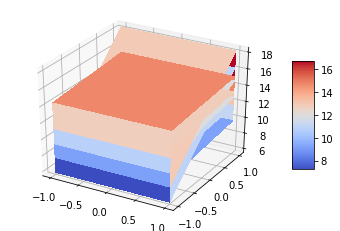

In [87]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['A']
x2=df['B']
x1, x2 = np.meshgrid(x1, x2)

surf = ax.plot_surface(x1, x2, Yhat, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

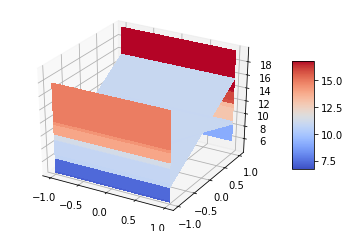

In [88]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['A']
x2=df['D']
x1, x2 = np.meshgrid(x1, x2)


surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

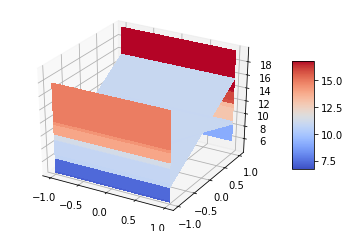

In [89]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

x1=df['B']
x2=df['D']
x1, x2 = np.meshgrid(x1, x2)

surf = ax.plot_surface(x1, x2, Y, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)

plt.show()

(c) when you are heat treating the most important step is pouring temperature based on the ols

(d) when you are not heat treating the most important factor is grain refiner